<a href="https://colab.research.google.com/github/syedsajidhussain/ML-Assessment/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [5]:
# create a directory
!mkdir brain_tumor_dataset


In [17]:
%cd brain_tumor_dataset

/content/drive/MyDrive/brain_tumor_dataset


In [18]:
!ls

In [19]:
# download the dataset
!wget https://ndownloader.figshare.com/articles/1512427/versions/5

--2023-09-16 06:27:07--  https://ndownloader.figshare.com/articles/1512427/versions/5
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.16.102.173, 54.217.124.219, 2a05:d018:1f4:d000:b283:27aa:b939:8ed4, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.16.102.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘5’

5                   100%[===================>] 838.76M  54.2MB/s    in 15s     

2023-09-16 06:27:23 (54.4 MB/s) - ‘5’ saved [879501695/879501695]



In [20]:
!# unzip the dataset and delete the zip
!unzip 5 && rm 5

Archive:  5
 extracting: brainTumorDataPublic_1-766.zip  
 extracting: brainTumorDataPublic_1533-2298.zip  
 extracting: brainTumorDataPublic_767-1532.zip  
 extracting: brainTumorDataPublic_2299-3064.zip  
 extracting: cvind.mat               
 extracting: README.txt              


In [21]:
# concatenate the multiple zipped data in a single zip
!cat brainTumorDataPublic_* > brainTumorDataPublic_temp.zip
!zip -FF brainTumorDataPublic_temp.zip --out data.zip

Fix archive (-FF) - salvage what can
 Found end record (EOCDR) - says expect single disk archive
Scanning for entries...
 copying: 1533.mat  (339637 bytes)
 copying: 1534.mat  (340418 bytes)
 copying: 1535.mat  (342222 bytes)
 copying: 1536.mat  (342920 bytes)
 copying: 1537.mat  (343484 bytes)
 copying: 1538.mat  (323526 bytes)
 copying: 1539.mat  (326770 bytes)
 copying: 1540.mat  (328641 bytes)
 copying: 1541.mat  (331088 bytes)
 copying: 1542.mat  (333075 bytes)
 copying: 1543.mat  (335548 bytes)
 copying: 1544.mat  (337196 bytes)
 copying: 1545.mat  (265792 bytes)
 copying: 1546.mat  (266357 bytes)
 copying: 1547.mat  (267792 bytes)
 copying: 1548.mat  (269198 bytes)
 copying: 1549.mat  (267728 bytes)
 copying: 1550.mat  (265932 bytes)
 copying: 1551.mat  (264956 bytes)
 copying: 1552.mat  (262235 bytes)
 copying: 1553.mat  (262966 bytes)
 copying: 1554.mat  (263969 bytes)
 copying: 1555.mat  (264622 bytes)
 copying: 1556.mat  (264585 bytes)
 copying: 1557.mat  (347465 bytes)
 cop

In [22]:
# remove the temporary files
!rm brainTumorDataPublic_*

In [23]:
# unzip the full archive and delete it
!unzip data.zip -d data && rm data.zip

Archive:  data.zip
  inflating: data/1533.mat           
  inflating: data/1534.mat           
  inflating: data/1535.mat           
  inflating: data/1536.mat           
  inflating: data/1537.mat           
  inflating: data/1538.mat           
  inflating: data/1539.mat           
  inflating: data/1540.mat           
  inflating: data/1541.mat           
  inflating: data/1542.mat           
  inflating: data/1543.mat           
  inflating: data/1544.mat           
  inflating: data/1545.mat           
  inflating: data/1546.mat           
  inflating: data/1547.mat           
  inflating: data/1548.mat           
  inflating: data/1549.mat           
  inflating: data/1550.mat           
  inflating: data/1551.mat           
  inflating: data/1552.mat           
  inflating: data/1553.mat           
  inflating: data/1554.mat           
  inflating: data/1555.mat           
  inflating: data/1556.mat           
  inflating: data/1557.mat           
  inflating: data/1558.mat     

In [24]:
# check that "data" contains 3064 files
!ls data | wc -l

3064


In [26]:
!git clone https://github.com/guillaumefrd/brain-tumor-mri-dataset.git

Cloning into 'brain-tumor-mri-dataset'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Receiving objects: 100% (33/33), 949.05 KiB | 15.31 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [28]:
%cd brain-tumor-mri-dataset/

/content/drive/MyDrive/brain_tumor_dataset/brain-tumor-mri-dataset


In [34]:
!ls

data_visualization.ipynb  images  LICENSE  matlab_to_numpy.py  README.md


In [31]:
!pip install hdf5storage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.8 MB/s eta 0:00:00


In [35]:
!python matlab_to_numpy.py /content/drive/MyDrive/brain_tumor_dataset

[3064/3064] images loaded: 100.0 %
labels: (3064,)
images: (3064, 512, 512)
masks: (3064, 512, 512)
labels.npy, images.npy, masks.npy saved in /content/drive/MyDrive/brain_tumor_dataset


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [38]:
integer_to_class = {'1':  'glioma (1)','2':'meningioma (2)', '3': 'pituitary tumor (3)'}

In [49]:
!cd /content/drive/MyDrive/brain_tumor_dataset

In [50]:
!ls

data_visualization.ipynb  images  LICENSE  matlab_to_numpy.py  README.md


In [51]:
labels = np.load('/content/drive/MyDrive/brain_tumor_dataset/labels.npy')
images = np.load('/content/drive/MyDrive/brain_tumor_dataset/images.npy')
masks = np.load('/content/drive/MyDrive/brain_tumor_dataset/masks.npy')

print(labels.shape)
print(images.shape)
print(masks.shape)

(3064,)
(3064, 512, 512)
(3064, 512, 512)


number of glioma (1): 708
number of meningioma (2): 1426
number of pituitary tumor (3): 930


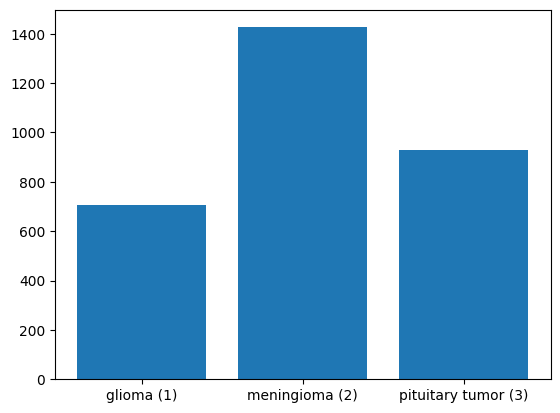

In [52]:
classes, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts,
        tick_label=[ 'glioma (1)', 'meningioma (2)', 'pituitary tumor (3)'])

for i, idx in enumerate(classes):
    print('number of {}: {}'.format(integer_to_class[str(idx)], counts[i]))

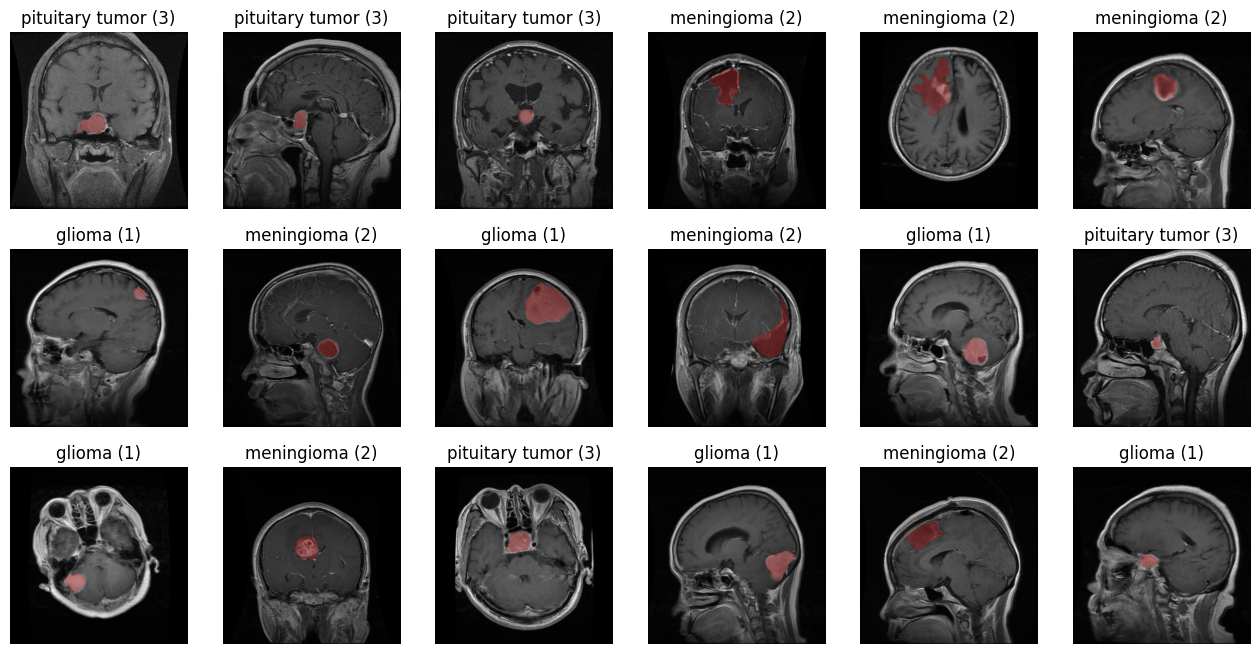

In [55]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow(images[idx], cmap='gray')

    # set black pixel as transparent for the mask
    mask = np.ma.masked_where(masks[idx] == False, masks[idx])
    plt.imshow(mask, alpha=0.3, cmap='Set1')

    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

In [56]:
def get_bounding_box(mask):
    """
    Return the bounding box of a mask image.
    """
    xmin, ymin, xmax, ymax = 0, 0, 0, 0

    for row in range(mask.shape[0]):
        if mask[row, :].max() != 0:
            ymin = row
            break

    for row in range(mask.shape[0] - 1, -1, -1):
        if mask[row, :].max() != 0:
            ymax = row
            break

    for col in range(mask.shape[1]):
        if mask[:, col].max() != 0:
            xmin = col
            break

    for col in range(mask.shape[1] - 1, -1, -1):
        if mask[:, col].max() != 0:
            xmax = col
            break

    return xmin, ymin, xmax, ymax


def crop_to_bbox(image, bbox, crop_margin=10):
    """
    Crop an image to the bounding by forcing a squared image as output.
    """
    x1, y1, x2, y2 =  bbox

    # force a squared image
    max_width_height = np.maximum(y2 - y1, x2 - x1)
    y2 = y1 + max_width_height
    x2 = x1 + max_width_height

    # in case coordinates are out of image boundaries
    y1 = np.maximum(y1 - crop_margin, 0)
    y2 = np.minimum(y2 + crop_margin, image.shape[0])
    x1 = np.maximum(x1 - crop_margin, 0)
    x2 = np.minimum(x2 + crop_margin, image.shape[1])

    return image[y1:y2, x1:x2]


In [57]:
from IPython.display import display, clear_output

dim_cropped_image = 224

images_cropped = []

for i in range(images.shape[0]):
    if i % 10 == 0:
        # print the pourcentage of images processed
        clear_output(wait=True)
        display('[{}/{}] images processed: {:.1f} %'
                .format(i+1, images.shape[0], (i+1) / images.shape[0] * 100))

    bbox = get_bounding_box(masks[i])
    image = crop_to_bbox(images[i], bbox, 20)
    image = cv2.resize(image, dsize=(dim_cropped_image, dim_cropped_image),
                       interpolation=cv2.INTER_CUBIC)
    images_cropped.append(image)

clear_output(wait=True)
display('[{}/{}] images processed: {:.1f} %'
        .format(i+1, images.shape[0], (i+1) / images.shape[0] * 100))

'[3064/3064] images processed: 100.0 %'

In [58]:
images_cropped = np.array(images_cropped)

print(images_cropped.shape)

(3064, 224, 224)


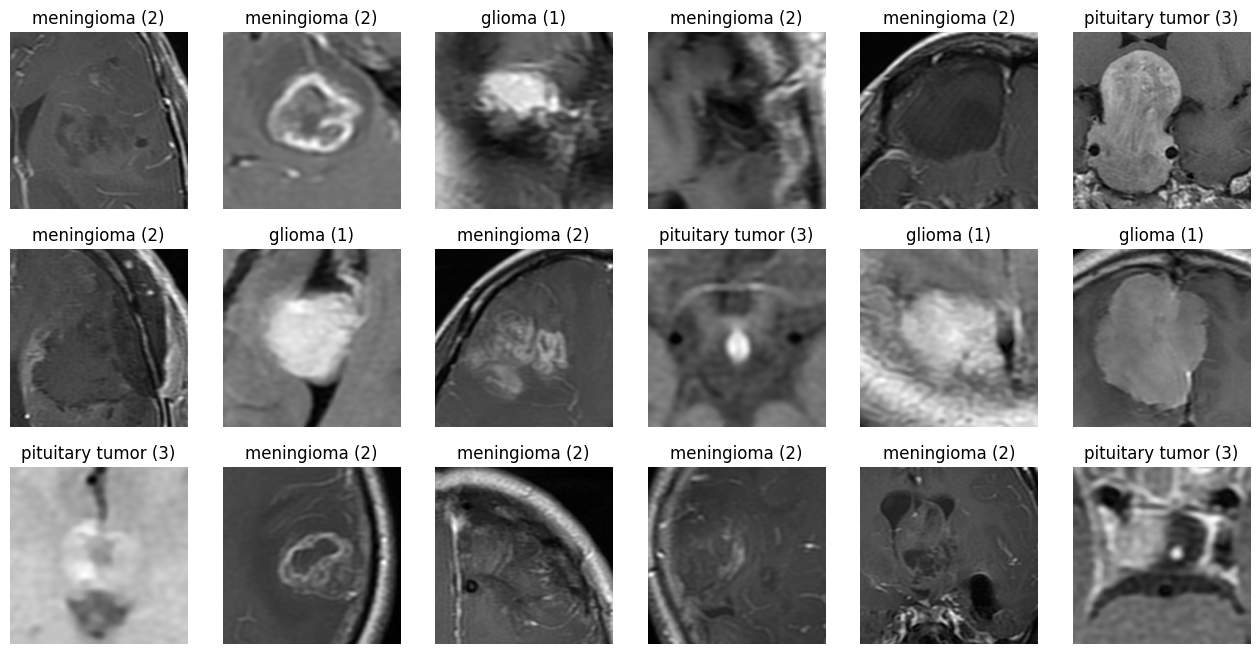

In [59]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow(images_cropped[idx], cmap='gray')
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')